# Previous_application Data

#####  Important
<br/>Below script is to stop scrolling for ouputs in jupyter notebook

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

The below case study deals with the dataset of <b>PREVIOUS APPLICATIONS</b>
<br/> Kindly follow installatoin guidelines as given below.
##### Installation guidelines
Copy the jupyter notebook at the same location where other notebooks are saved 
<br/>At the same location, create a folder named inputData and copy all the csv files(datasets) in this folder

Lets Load all important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# format floats only to handle exponential figure's
pd.options.display.float_format = '{:.2f}'.format

Derived Metrics for Visualisation

In [4]:
# weekdays as a dictionary (considering Monday as first working day of the week)
weekDays = {'MONDAY':1,'TUESDAY':2,'WEDNESDAY':3,'THURSDAY':4,'FRIDAY':5,'SATURDAY':6,'SUNDAY':7}

##### Data Loading

In [5]:
# Read data for all previous applications
df_main = pd.read_csv('./inputData/previous_application.csv')

In [6]:
df_main.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [7]:
df_prevappln = df_main.copy()

##### Data Analysis

In [8]:
df_prevappln.shape
org_rowcount = df_prevappln.shape[0] # get number of row count
org_colcount = df_prevappln.shape[1] # get number of col count

Get list of column names and its data type

In [9]:
for column in df_prevappln.columns: 
    print('Column Name : {0}  |-> Data Type : {1}'.format(column, df_prevappln[column].dtypes))

Column Name : SK_ID_PREV  |-> Data Type : int64
Column Name : SK_ID_CURR  |-> Data Type : int64
Column Name : NAME_CONTRACT_TYPE  |-> Data Type : object
Column Name : AMT_ANNUITY  |-> Data Type : float64
Column Name : AMT_APPLICATION  |-> Data Type : float64
Column Name : AMT_CREDIT  |-> Data Type : float64
Column Name : AMT_DOWN_PAYMENT  |-> Data Type : float64
Column Name : AMT_GOODS_PRICE  |-> Data Type : float64
Column Name : WEEKDAY_APPR_PROCESS_START  |-> Data Type : object
Column Name : HOUR_APPR_PROCESS_START  |-> Data Type : int64
Column Name : FLAG_LAST_APPL_PER_CONTRACT  |-> Data Type : object
Column Name : NFLAG_LAST_APPL_IN_DAY  |-> Data Type : int64
Column Name : RATE_DOWN_PAYMENT  |-> Data Type : float64
Column Name : RATE_INTEREST_PRIMARY  |-> Data Type : float64
Column Name : RATE_INTEREST_PRIVILEGED  |-> Data Type : float64
Column Name : NAME_CASH_LOAN_PURPOSE  |-> Data Type : object
Column Name : NAME_CONTRACT_STATUS  |-> Data Type : object
Column Name : DAYS_DECISIO

Let's check is there any null present in this dataset.

In [10]:
df_prevappln.isnull().values.any()

True

So data set has <b>null</b> values. Let start the cleaning
<br/> Determine <i>count</i> and <i>percentage (%) </i> of <b>null</b> values in columns where <b>null</b> values are present

In [11]:
for column in df_prevappln.columns:
    if df_prevappln[column].isnull().any():
        print('{0} has {1} , {2} % null values'.format(column, 
                                                         df_prevappln[column].isnull().sum(),
                                                         round(100*(df_prevappln[column].isnull().sum()/len(df_prevappln)))))

AMT_ANNUITY has 372235 , 22.0 % null values
AMT_CREDIT has 1 , 0.0 % null values
AMT_DOWN_PAYMENT has 895844 , 54.0 % null values
AMT_GOODS_PRICE has 385515 , 23.0 % null values
RATE_DOWN_PAYMENT has 895844 , 54.0 % null values
RATE_INTEREST_PRIMARY has 1664263 , 100.0 % null values
RATE_INTEREST_PRIVILEGED has 1664263 , 100.0 % null values
NAME_TYPE_SUITE has 820405 , 49.0 % null values
CNT_PAYMENT has 372230 , 22.0 % null values
PRODUCT_COMBINATION has 346 , 0.0 % null values
DAYS_FIRST_DRAWING has 673065 , 40.0 % null values
DAYS_FIRST_DUE has 673065 , 40.0 % null values
DAYS_LAST_DUE_1ST_VERSION has 673065 , 40.0 % null values
DAYS_LAST_DUE has 673065 , 40.0 % null values
DAYS_TERMINATION has 673065 , 40.0 % null values
NFLAG_INSURED_ON_APPROVAL has 673065 , 40.0 % null values


As you can see from above, there are columns which are almost or have 100% null values. Lets drop those columns.

##### Data Cleaning

In [12]:
cols_to_drop = ['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED']
df_prevappln.drop(cols_to_drop,axis=1,inplace=True)

Remove columns where number of unique value is only 1

In [13]:
unique = df_prevappln.nunique()
unique = unique[unique.values == 1]

In [14]:
df_prevappln.drop(labels = list(unique.index), axis =1, inplace=True)

Let us examine type of loans

In [15]:
df_contractType = pd.pivot_table(df_prevappln, index =['NAME_CONTRACT_TYPE'])
df_contractType

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,HOUR_APPR_PROCESS_START,NFLAG_INSURED_ON_APPROVAL,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,SK_ID_CURR,SK_ID_PREV
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,
Cash loans,26119.82,274760.43,304061.49,0.00,443072.95,28.35,-571.82,365236.64,-284.78,87803.45,-155.43,89134.45,11.99,0.80,1.00,0.00,12.71,278338.04,1937952.05
Consumer loans,10128.05,93787.83,91524.59,7152.16,93962.70,11.21,-1249.57,365243.00,2889.38,41578.09,-859.79,43109.89,13.04,0.16,1.00,0.09,664.74,278358.06,1906436.12
Revolving loans,11384.79,97816.24,173505.60,3260.82,202849.07,0.00,-684.36,120299.69,128982.48,271478.97,365243.00,314874.24,12.32,0.01,0.97,0.05,156.10,278441.94,1928426.38
XNA,nan,0.00,0.00,nan,nan,nan,-415.49,nan,nan,nan,nan,nan,12.77,nan,1.00,nan,45.73,270488.24,1925340.96


As you can see from above that <u>there is contract type <i>XNA</i> for which there are columns which have <b>most nan values</b></u>. 
<br/><b>Remove all those rows where contract type is <i>XNA</i></b>

In [16]:
df_prevappln.drop(df_prevappln.loc[df_prevappln['NAME_CONTRACT_TYPE']=='XNA'].index, inplace=True)

In [17]:
# Recheck
df_contractType = pd.pivot_table(df_prevappln, index =['NAME_CONTRACT_TYPE'])
df_contractType

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,HOUR_APPR_PROCESS_START,NFLAG_INSURED_ON_APPROVAL,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,SK_ID_CURR,SK_ID_PREV
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,
Cash loans,26119.82,274760.43,304061.49,0.00,443072.95,28.35,-571.82,365236.64,-284.78,87803.45,-155.43,89134.45,11.99,0.80,1.00,0.00,12.71,278338.04,1937952.05
Consumer loans,10128.05,93787.83,91524.59,7152.16,93962.70,11.21,-1249.57,365243.00,2889.38,41578.09,-859.79,43109.89,13.04,0.16,1.00,0.09,664.74,278358.06,1906436.12
Revolving loans,11384.79,97816.24,173505.60,3260.82,202849.07,0.00,-684.36,120299.69,128982.48,271478.97,365243.00,314874.24,12.32,0.01,0.97,0.05,156.10,278441.94,1928426.38


Drop columns which have more than 30% null values

In [18]:
threshold = 0.3 # 30%
col_names = list(df_prevappln.columns[(df_prevappln.isnull().sum()/len(df_prevappln)) > threshold])
df_prevappln.drop(labels = col_names,axis =1,inplace=True)        
print("Number of Columns dropped\t: ",len(col_names))
print("List of Columns dropped\t: ",col_names)

Number of Columns dropped	:  9
List of Columns dropped	:  ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


Check which columns have nulls/nan values

In [19]:
print(round(100*(df_prevappln.isnull().sum()/len(df_prevappln))))

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE               23.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                   22.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.00
dtype: float64


That leaves us with 3 columns **( AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT )** where we still have null or nan values.
Referring to the data dictionary we know that -
<br/>**AMT_ANNUITY** is Annuity of previous application
<br/>**AMT_GOODS_PRICE** is Goods price of good that client asked for (if applicable) on the previous application
<br/>**CNT_PAYMENT** is the Term of previous credit of the previous application
<br/> Let's analyse these columns and check if we can impute values

In [20]:
df_prevappln.loc[:, ['AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_PAYMENT']].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1297979.00,1284699.00,1297984.00
mean,15955.12,227847.28,16.05
std,14782.14,315396.56,14.57
min,0.00,0.00,0.00
25%,6321.78,50841.00,6.00
50%,11250.00,112320.00,12.00
75%,20658.42,234000.00,24.00
max,418058.15,6905160.00,84.00


#### Imputation and Reasons/Explanation

**AMT_ANNUITY** : Impute the value of this column to the median as that is the lowest(compared between mean and median)

In [21]:
df_prevappln.loc[np.isnan(df_prevappln['AMT_ANNUITY']), ['AMT_ANNUITY']] = df_prevappln['AMT_ANNUITY'].median()

**AMT_GOODS_PRICE** : Impute the value of this column to 0 as we cannot say from the given the data if the client asked for goods price on the prev application

In [22]:
df_prevappln.loc[np.isnan(df_prevappln['AMT_GOODS_PRICE']), ['AMT_GOODS_PRICE']] = 0

Check unique values for each value in remaining column

In [23]:
print((df_prevappln['CNT_PAYMENT'].value_counts()*100)/len(df_prevappln))

12.00   19.35
6.00    11.41
0.00     8.68
10.00    8.49
24.00    8.25
18.00    4.64
36.00    4.35
60.00    3.21
48.00    2.83
8.00     1.82
4.00     1.61
30.00    1.01
14.00    0.49
42.00    0.43
16.00    0.34
5.00     0.24
54.00    0.13
20.00    0.11
7.00     0.09
9.00     0.07
3.00     0.07
15.00    0.05
11.00    0.04
72.00    0.01
13.00    0.00
17.00    0.00
84.00    0.00
22.00    0.00
23.00    0.00
26.00    0.00
35.00    0.00
66.00    0.00
29.00    0.00
28.00    0.00
32.00    0.00
19.00    0.00
34.00    0.00
59.00    0.00
45.00    0.00
41.00    0.00
47.00    0.00
21.00    0.00
44.00    0.00
39.00    0.00
38.00    0.00
46.00    0.00
40.00    0.00
33.00    0.00
53.00    0.00
Name: CNT_PAYMENT, dtype: float64


**CNT_PAYMENT** : Impute the value of  this column to median(50%) value as from above we can see most number (approx 20%) of term applications are closer or equal to median(50%) value

In [24]:
df_prevappln.loc[np.isnan(df_prevappln['CNT_PAYMENT']), ['CNT_PAYMENT']] = df_prevappln['CNT_PAYMENT'].median()

Re-check nulls / nan values

In [25]:
print(round(100*(df_prevappln.isnull().sum()/len(df_prevappln))))

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                   0.00
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_GOODS_PRICE               0.00
WEEKDAY_APPR_PROCESS_START    0.00
HOUR_APPR_PROCESS_START       0.00
FLAG_LAST_APPL_PER_CONTRACT   0.00
NFLAG_LAST_APPL_IN_DAY        0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_CLIENT_TYPE              0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
CNT_PAYMENT                   0.00
NAME_YIELD_GROUP              0.00
PRODUCT_COMBINATION           0.00
dtype: float64


In [26]:
new_rowcount=df_prevappln.shape[0]
new_colcount=df_prevappln.shape[1]
print("We are now left with -> ",(new_rowcount,new_colcount) ,
      "rows & columns as compared to original ->",(org_rowcount,org_colcount))

We are now left with ->  (1669868, 26) rows & columns as compared to original -> (1670214, 37)


Now that we have some relevant & cleaned data for further analysis, let us go through the attributes and start making observations.

##### Data Visualization and Insights

In [27]:
# Graph plotting backgroud Grid style
sns.set(style="darkgrid")

###### Univariate Analysis

Text(0.5, 1.0, 'Hourwise Client Applications')

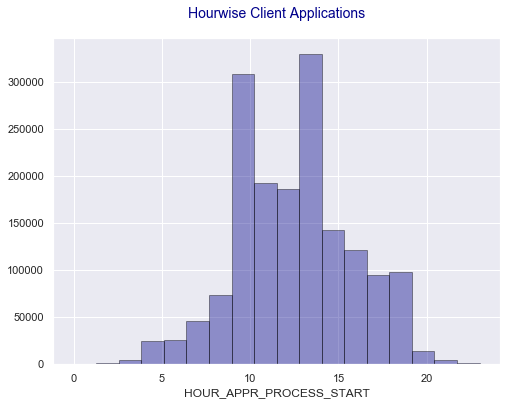

In [28]:
# what day hour did the client apply for the previous application
plt.figure(figsize=(8,6))
sns.distplot(df_prevappln['HOUR_APPR_PROCESS_START'], hist=True, kde=False,bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'})
plt.title('Hourwise Client Applications',pad=20,fontsize=14,color='darkblue')

**Insights :** <br/>Most of the applications are processed during noon. <br/>Most of the applications are proceesed during work hours.

<b>Derived Metrics for Visualisation</b>

In [29]:
df_prevappln['DAY_OF_WEEK'] = df_prevappln['WEEKDAY_APPR_PROCESS_START'].apply(lambda day : weekDays[day])

Text(0.5, 1.0, 'Daywise Client Applications')

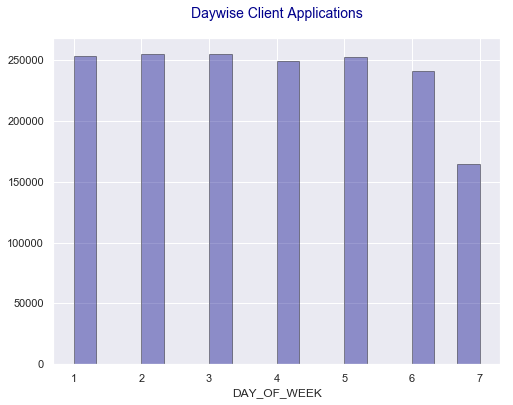

In [30]:
# what weekday  did the client apply for the previous application
plt.figure(figsize=(8,6))
sns.distplot(df_prevappln['DAY_OF_WEEK'], hist=True, kde=False,bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'})
plt.title('Daywise Client Applications',pad=20,fontsize=14,color='darkblue')

**Insights :**<br/> Client has applied for loan amount applications almost on all days except 7th day (Sunday). <br/>Loan providing companies always have high number of requests. Almost heavy rush of requests is seen on almost every weekday

In [31]:
plt.figure(figsize=(10,10),dpi=1600)
data=df_prevappln.WEEKDAY_APPR_PROCESS_START.value_counts()
ax1 = plt.subplot2grid((2,2),(0,0))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
plt.pie(data.values,labels=data.index,autopct='%1.2f%%', shadow=False,textprops={'fontsize':8,'color':"black"},colors=colors)
plt.axis('equal')
plt.title('Loan Approval Days',pad=20,fontsize=14,color='darkblue')
ax2 = plt.subplot2grid((2,2),(0,1))
sector_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data.values,labels=data.index,colors=colors,wedgeprops = { 'linewidth' :2, 'edgecolor' : 'white' },
        startangle=90,autopct='%1.2f%%',textprops={'fontsize':8,'color':"black"})
p=plt.gcf()
p.gca().add_artist(sector_circle)
plt.title('Loan Approval Days',pad=20,fontsize=14,color='darkblue')
plt.show()

**Insights:** <br/> Most of the previous loan applications are processed between Monday to Wednesday(1st 3 days of the week)

Text(0.5, 1.0, 'Previous application contract status')

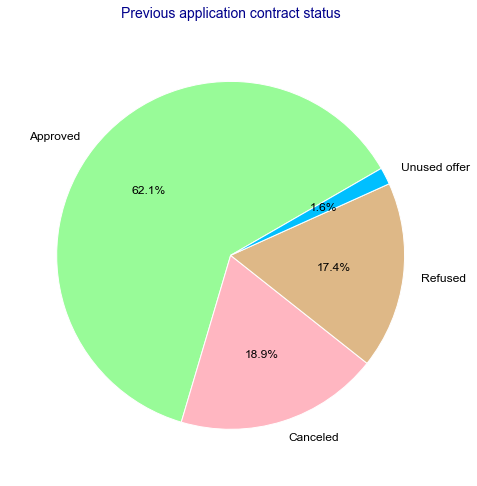

In [32]:
plt.figure(figsize=(8,8))
data=df_prevappln.NAME_CONTRACT_STATUS.value_counts()
colors = ['palegreen','lightpink','burlywood','deepskyblue']
plt.pie(data.values,labels=data.index,colors=colors,autopct='%1.1f%%',textprops={'fontsize':12,'color':"black"},startangle=30)
plt.title('Previous application contract status',pad=20,fontsize=14,color='darkblue')

**Insights:** <br/>High percentage of the previous loan applications were approved

In [33]:
# Sort the data frame by applicaiton amount in descending order
df_prevappln=df_prevappln.sort_values(by='AMT_APPLICATION',ascending=False)

Text(0.5, 1.0, 'Top Product Combinations')

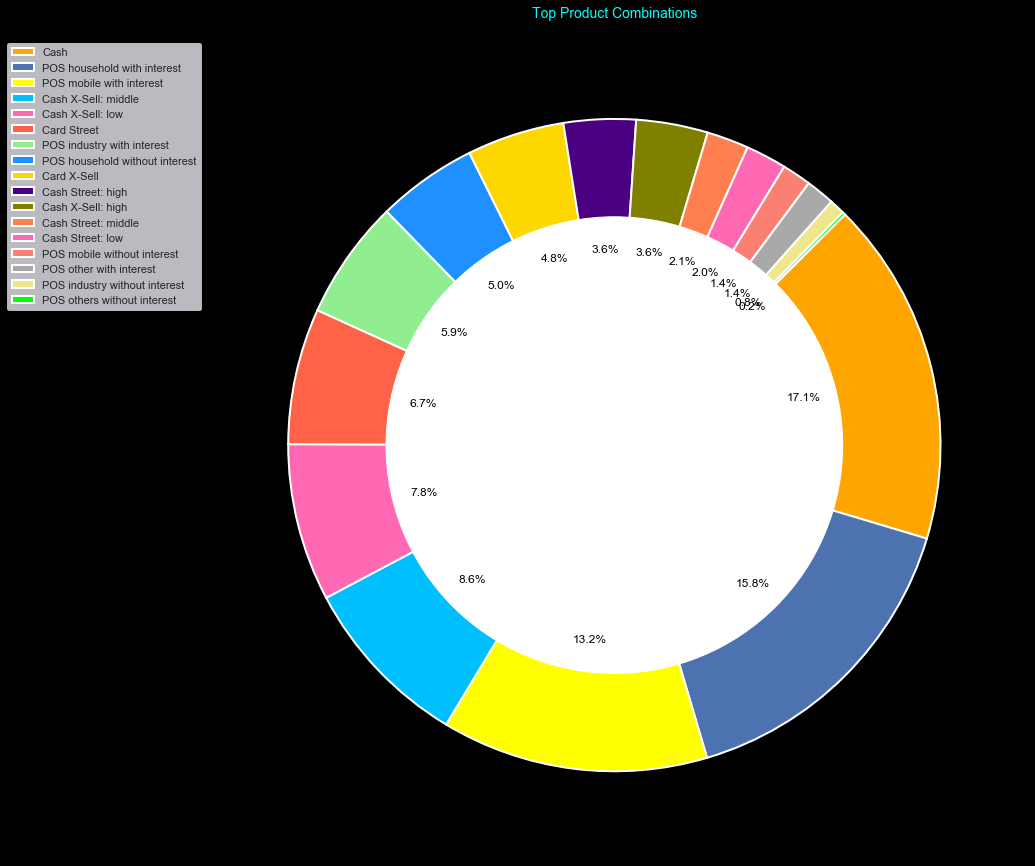

In [34]:
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('black')
colors = ['orange','b','yellow','deepskyblue','hotpink','tomato','lightgreen','dodgerblue',
          'gold','indigo','olive','coral','hotpink','salmon','darkgray','khaki','lime']
data=df_prevappln.PRODUCT_COMBINATION.value_counts()
sector_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(sector_circle)
plt.pie(data.values,labels=data.index,colors=colors,wedgeprops = { 'linewidth' :2, 'edgecolor' : 'white' },
        startangle=45,autopct='%1.1f%%',textprops={'fontsize':12,'color':"black"},counterclock=False)
plt.legend(data.index,bbox_to_anchor=(0,1))
plt.title('Top Product Combinations',pad=20,fontsize=14,color='aqua')

**Insights**:<br/>Cash is the top product combination for previous loan applications

##### Bivariate Analysis

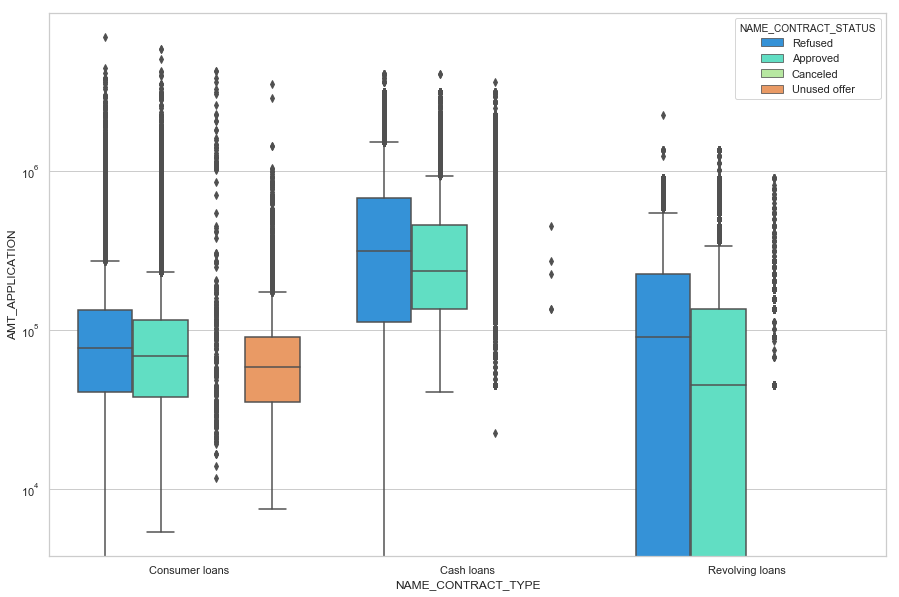

In [35]:
# Graph plotting backgroud Grid style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x = 'NAME_CONTRACT_TYPE' , y = 'AMT_APPLICATION',hue = 'NAME_CONTRACT_STATUS',
                 data = df_prevappln,palette='rainbow')
ax.set_yscale('log')

**Insights:**<br/>Cash Loans are the most refused as compared to other loans. There are lot of unused offers on the consumer loans. <br/>There are no cancellations or unused offers on the Cash and Revolving loans 

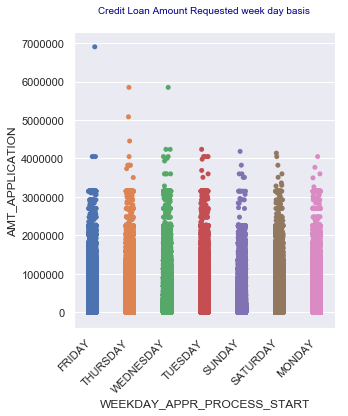

In [36]:
# Day wise loan amount
sns.set(style="darkgrid")
g = sns.catplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=df_prevappln)
plt.xticks(horizontalalignment='right',rotation=45)
plt.title('Credit Loan Amount Requested week day basis',pad=20,fontsize=10,color='darkblue')
plt.show()

**Insights :**<br/>Loan Applications which had high amounts are requested towards the end of the week by clients - between Wed to Fri

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

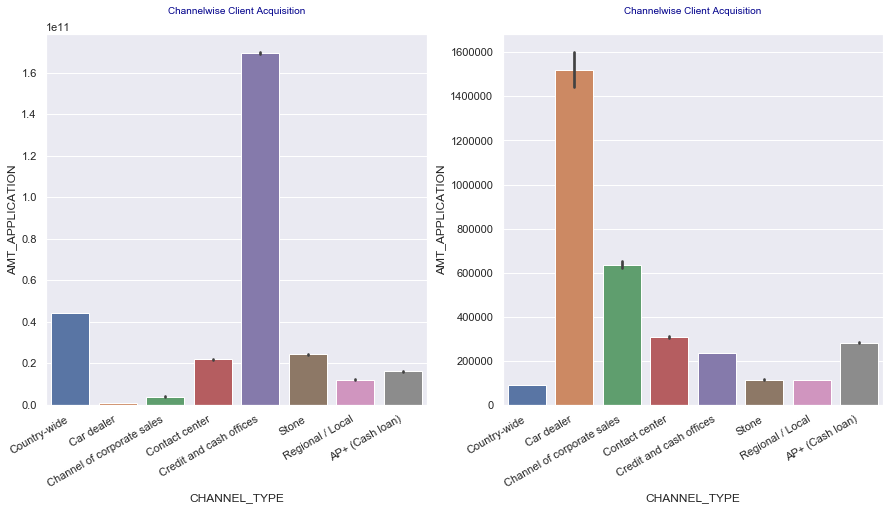

In [37]:
#Through which channel we acquired the client on the previous application
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
g1 = sns.barplot(x = 'CHANNEL_TYPE', y = 'AMT_APPLICATION', data = df_prevappln,estimator = np.sum)
plt.title('Channelwise Client Acquisition',pad=20,fontsize=10,color='darkblue')
plt.xticks(horizontalalignment='right',rotation=30)
plt.subplot(2,2,2)
g2 = sns.barplot(x = 'CHANNEL_TYPE', y = 'AMT_APPLICATION', data = df_prevappln)
plt.title('Channelwise Client Acquisition',pad=20,fontsize=10,color='darkblue')
plt.xticks(horizontalalignment='right',rotation=30)

**Insights :** <br/>Considering the sum of loan amounts asked,clients were acquired the most on through the credit and cash offices channel followed by country wide. <br/>However, considering the average loan amount asked the clients were acquired the most on 
through the car dealership channel followed by corporate sales.

([<matplotlib.patches.Wedge at 0x1f59e4d1be0>,
 [Text(-0.9088685914405299, 0.6196433518508105, 'XNA'),
  Text(-0.4996067617944483, -0.9799964712024557, 'middle'),
  Text(0.8742235332029691, -0.6676325441394519, 'high'),
  Text(0.8962212885304615, 0.6377988726744502, 'low_normal'),
  Text(0.18952625964174435, 1.0835496282617656, 'low_action')],
 [Text(-0.4957465044221071, 0.33798728282771484, '31.0%'),
  Text(-0.2725127791606081, -0.534543529746794, '23.1%'),
  Text(0.4768491999288922, -0.36416320589424644, '21.2%'),
  Text(0.4888479755620698, 0.34789029418606376, '19.3%'),
  Text(0.10337795980458782, 0.591027069960963, '5.5%')])

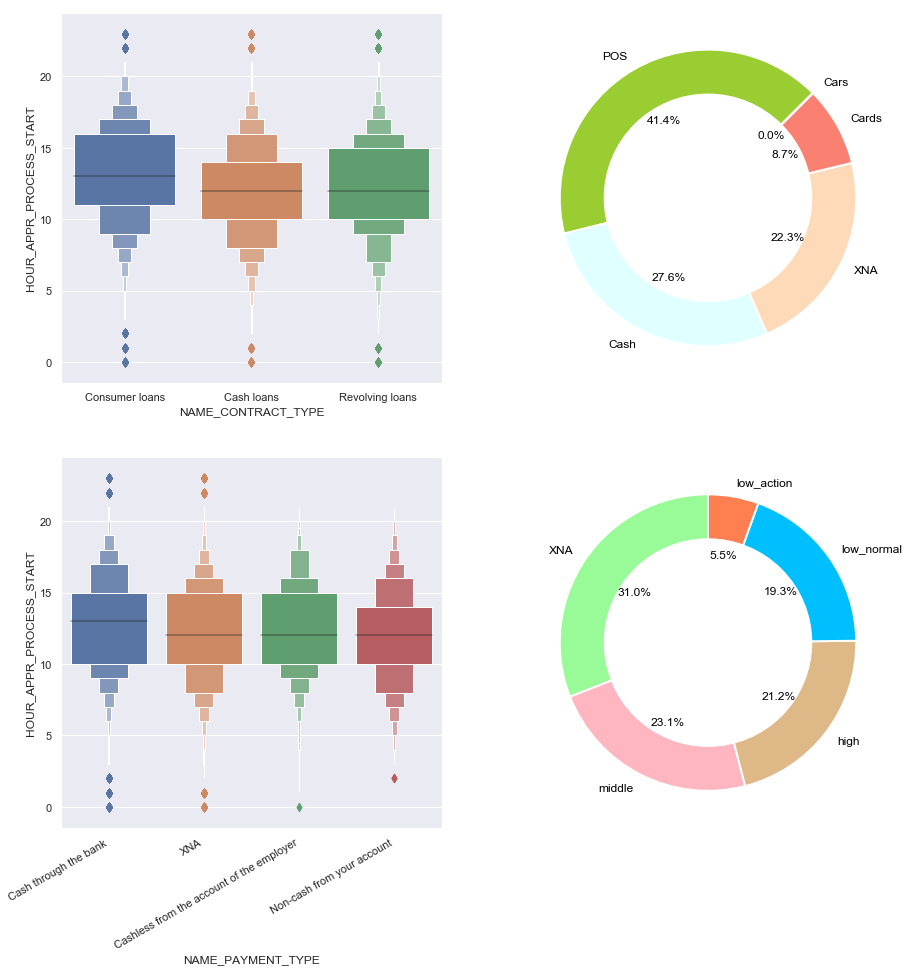

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxenplot(x = 'NAME_CONTRACT_TYPE' , y = 'HOUR_APPR_PROCESS_START',data = df_prevappln)
plt.subplot(2,2,2)
data=df_prevappln.NAME_PORTFOLIO.value_counts()
colors = ['yellowgreen','lightcyan','peachpuff','salmon']
sector_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(sector_circle)
plt.pie(data.values,labels=data.index,colors=colors,wedgeprops = { 'linewidth' :2, 'edgecolor' : 'white' },
        startangle=45,autopct='%1.1f%%',textprops={'fontsize':12,'color':"black"})
plt.subplot(2,2,3)
sns.boxenplot(x = 'NAME_PAYMENT_TYPE' , y = 'HOUR_APPR_PROCESS_START',data = df_prevappln)
plt.xticks(horizontalalignment='right',rotation=30)
plt.subplot(2,2,4)
data=df_prevappln.NAME_YIELD_GROUP.value_counts()
colors = ['palegreen','lightpink','burlywood','deepskyblue','coral']
sector_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(sector_circle)
plt.pie(data.values,labels=data.index,colors=colors,wedgeprops = { 'linewidth' :2, 'edgecolor' : 'white' },
        startangle=90,autopct='%1.1f%%',textprops={'fontsize':12,'color':"black"})

**Insights :** <br/>Consumer loans are the highly offered loans and are less likely to default<br/>Mostly the previous applications were POS followed by Cash<br/>On an average 'Cash through the bank' is most used 
payment method used by the clients for paying loan amounts followed by cashless transaction. There is a need to educate clients 
and improve security  loan payment facilities so that more and more clients use cashless mode.

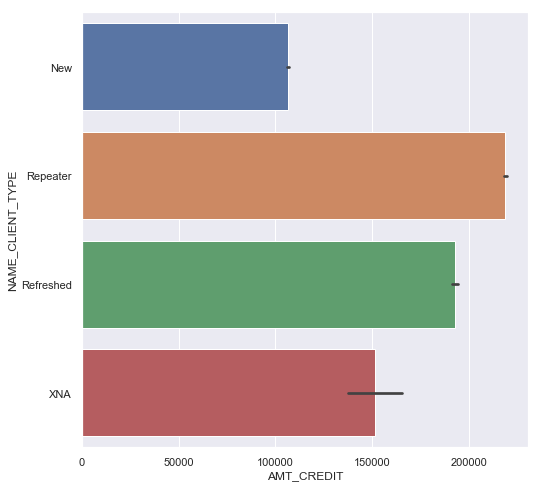

In [39]:
plt.figure(figsize=(8, 8))
sns.barplot(x = 'AMT_CREDIT' , y = 'NAME_CLIENT_TYPE',data = df_prevappln)

**Insights:**<br/> Many people struggle to get loans due to insufficient  credit histories. From above it is seen that loan companies have credited loan amounts to repeaters(old) clients as they have credit history. So old clients are the more favored above others to provide loans by the loan comapnies.<br/>It is also seen that loans are credited to clients for whom the data is not available with the Loan companies(Client Type=XNA). This could be a FRAUD or may some error in th system due to which client data is not captured. It is necessary that the loan companies focus on capturing client data while disbursing loans else there will be huge effort required to recover the loan amount.

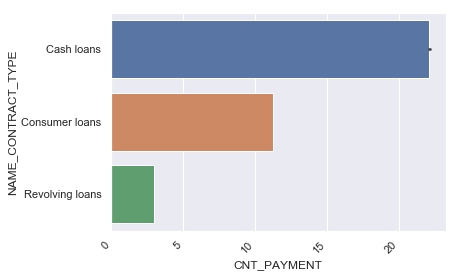

In [40]:
# Longest Term of prev credit
df_prevappln = df_prevappln.sort_values(by='CNT_PAYMENT',ascending=False)
g = sns.barplot(x='CNT_PAYMENT', y='NAME_CONTRACT_TYPE', data=df_prevappln)
plt.xticks(horizontalalignment='right',rotation=45)
plt.show()

**Insights :** Cashloans have longest term. More than 20 months as seen from above !

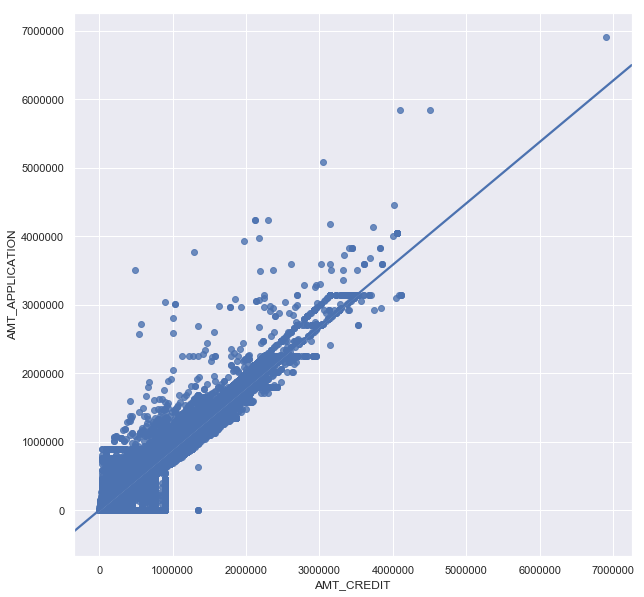

In [41]:
plt.figure(figsize=(10, 10))
sns.regplot(x=df_prevappln['AMT_CREDIT'], y=df_prevappln['AMT_APPLICATION'])
plt.show()

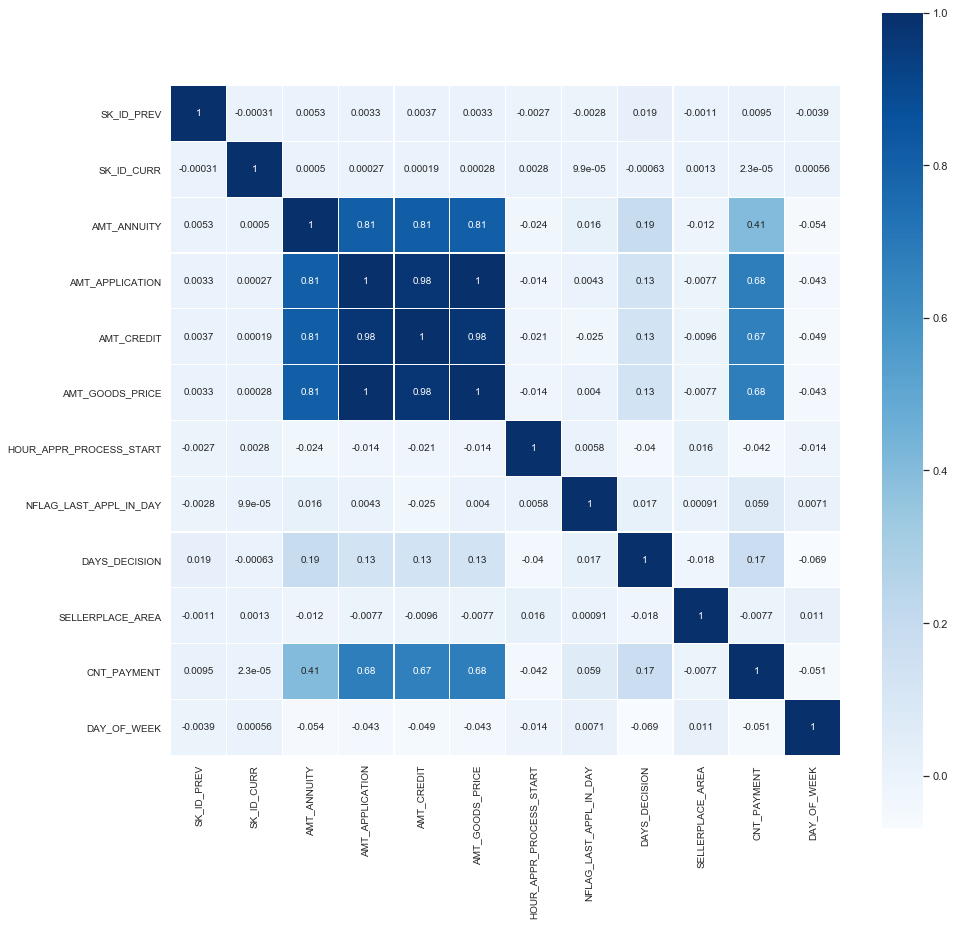

In [42]:
cor=df_prevappln.corr()
plt.figure(figsize=(15,15))
heatmap=sns.heatmap(cor,cmap="Blues" ,annot=True ,linewidths=0.10 , annot_kws={"size": 10},cbar=True,square=True)
heatmap.tick_params(direction='out',labelsize=10)
plt.show()

**Insights :** <br/>Following columns are highly correlated<ol type="1">
<li>AMT_ANNUITY</li>
<li>AMT_APPLICATION</li>
<li>AMT_CREDIT</li>
<li>AMT_DOWN_PAYMENT</li>
<li>AMT_GOODS_PRICE</li>
</ol>
<br/>Loan Amount requested by client orignally and final credit loan ammount on the previous application given to the client are highly correlated as seen from above scatter and heat maps. This means the loan companies are providing almost closest amount of for which the client has made an initial request for. 
<br/>We have already seen earlier that consumer loans are the more offered than other loans 

**Next :** We will look at the Contract Type and Good Categories for the Loan for each contract and make some observations.

In [43]:
df_GoodsCateg = df_prevappln[['NAME_CONTRACT_TYPE','NAME_GOODS_CATEGORY','AMT_APPLICATION','NAME_CONTRACT_STATUS']]

In [44]:
df_GoodsCateg.drop(df_GoodsCateg.loc[df_GoodsCateg['NAME_GOODS_CATEGORY']=='XNA'].index, inplace=True)

C:\Python\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
df = pd.pivot_table(df_GoodsCateg, index =['NAME_GOODS_CATEGORY'],columns=['NAME_CONTRACT_TYPE'],
                       values=['AMT_APPLICATION'],aggfunc = np.sum,fill_value=0)
df

AMT_APPLICATION                
NAME_CONTRACT_TYPE        Consumer loans Revolving loans
NAME_GOODS_CATEGORY                                     
Additional Service           22533309.00            0.00
Animals                         90000.00            0.00
Audio/Video               10348653042.04      5463382.95
Auto Accessories            676119738.28            0.00
Clothing and Accessories   4690268948.97            0.00
Computers                 11252872870.06      2129064.66
Construction Materials     3766991967.63            0.00
Consumer Electronics      11061529268.40     22986019.62
Direct Sales                 97849794.56            0.00
Education                    24449251.45            0.00
Fitness                      27419855.76            0.00
Furniture                  7988125118.09      1061406.00
Gardening                   372868852.41            0.00
Homewares                   800264487.64            0.00
House Construction            3000001.50            0.00
Insurance                     6215161.14            0.00
Jewelry                     529959033.77            0.00
Medical Supplies            694239400.62            0.00
Medicine                    277026707.25            0.00
Mobile                    10959254029.26      1244068.25
Office Appliances           146225523.06            0.00
Other                       176758581.06        32985.00
Photo / Cinema Equipment   1556721722.25       173232.18
Sport and Leisure           324002121.75            0.00
Tourism                     478544268.87            0.00
Vehicles                    765829412.15            0.00
Weapon                        9072340.56            0.00

In [46]:
# Sort the data in descending order
df=df.sort_values(by=[('AMT_APPLICATION','Consumer loans')],ascending=False)

In [47]:
df['%Consumer Loan'] = round(100*((df[('AMT_APPLICATION','Consumer loans')] / 
                                   df[('AMT_APPLICATION','Consumer loans')].sum())),5)
df['%Revolving Loan'] = round(100*((df[('AMT_APPLICATION','Revolving loans')] / 
                                    df[('AMT_APPLICATION','Revolving loans')].sum())),5)

In [48]:
df

AMT_APPLICATION                 %Consumer Loan  \
NAME_CONTRACT_TYPE        Consumer loans Revolving loans                  
NAME_GOODS_CATEGORY                                                       
Computers                 11252872870.06      2129064.66          16.78   
Consumer Electronics      11061529268.40     22986019.62          16.50   
Mobile                    10959254029.26      1244068.25          16.34   
Audio/Video               10348653042.04      5463382.95          15.43   
Furniture                  7988125118.09      1061406.00          11.91   
Clothing and Accessories   4690268948.97            0.00           6.99   
Construction Materials     3766991967.63            0.00           5.62   
Photo / Cinema Equipment   1556721722.25       173232.18           2.32   
Homewares                   800264487.64            0.00           1.19   
Vehicles                    765829412.15            0.00           1.14   
Medical Supplies            694239400.62            0.00           1.04   
Auto Accessories            676119738.28            0.00           1.01   
Jewelry                     529959033.77            0.00           0.79   
Tourism                     478544268.87            0.00           0.71   
Gardening                   372868852.41            0.00           0.56   
Sport and Leisure           324002121.75            0.00           0.48   
Medicine                    277026707.25            0.00           0.41   
Other                       176758581.06        32985.00           0.26   
Office Appliances           146225523.06            0.00           0.22   
Direct Sales                 97849794.56            0.00           0.15   
Fitness                      27419855.76            0.00           0.04   
Education                    24449251.45            0.00           0.04   
Additional Service           22533309.00            0.00           0.03   
Weapon                        9072340.56            0.00           0.01   
Insurance                     6215161.14            0.00           0.01   
House Construction            3000001.50            0.00           0.00   
Animals                         90000.00            0.00           0.00   

                         %Revolving Loan  
NAME_CONTRACT_TYPE                        
NAME_GOODS_CATEGORY                       
Computers                           6.43  
Consumer Electronics               69.46  
Mobile                              3.76  
Audio/Video                        16.51  
Furniture                           3.21  
Clothing and Accessories            0.00  
Construction Materials              0.00  
Photo / Cinema Equipment            0.52  
Homewares                           0.00  
Vehicles                            0.00  
Medical Supplies                    0.00  
Auto Accessories                    0.00  
Jewelry                             0.00  
Tourism                             0.00  
Gardening                           0.00  
Sport and Leisure                   0.00  
Medicine                            0.00  
Other                               0.10  
Office Appliances                   0.00  
Direct Sales                        0.00  
Fitness                             0.00  
Education                           0.00  
Additional Service                  0.00  
Weapon                              0.00  
Insurance                           0.00  
House Construction                  0.00  
Animals                             0.00

In [49]:
df['NAME_GOODS_CATEGORY'] = df.index

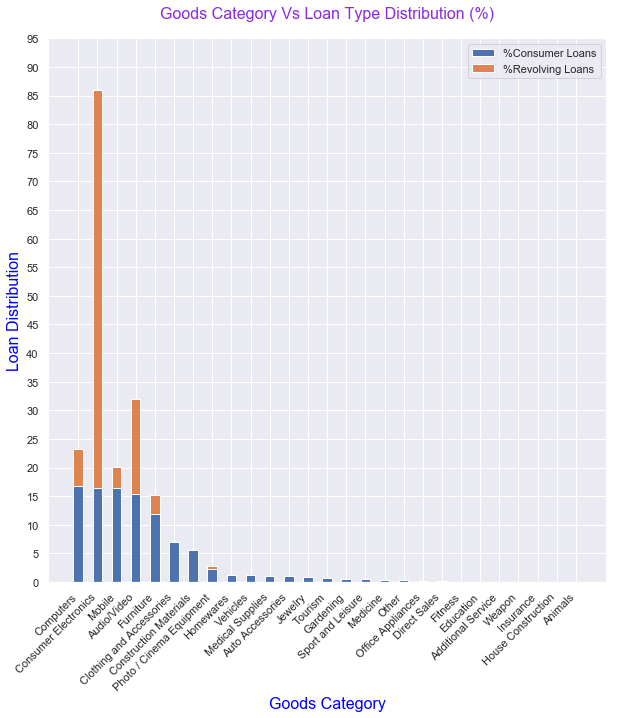

In [50]:
# Stacked barplot
barwidth = 0.5       
edgecolor='white'
plt.figure(figsize=(10, 10))

prim_bar = plt.bar(df['NAME_GOODS_CATEGORY'], df['%Consumer Loan'], edgecolor=edgecolor, width=barwidth)
sec_bar = plt.bar(df['NAME_GOODS_CATEGORY'], df['%Revolving Loan'], bottom=df['%Consumer Loan'], edgecolor=edgecolor, width=barwidth)
plt.title('Goods Category Vs Loan Type Distribution (%)',pad=20,fontsize=16,color='blueviolet')
plt.xlabel('Goods Category',fontsize=16,color='blue')
plt.ylabel('Loan Distribution',fontsize=16,color='blue')
plt.yticks(np.arange(0,100,5))
plt.xticks(horizontalalignment='right',rotation=45)
plt.legend((prim_bar[0], sec_bar[0]), ('%Consumer Loans', '%Revolving Loans'))
plt.show()

Insights : <b>Revolving Loans</b> are <u>more <b>(approx 70%)</b></u> for <b>Consumer Electronics</b> than any other goods category